In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize

In [3]:
df = pd.read_csv("./IMDB_Dataset.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [4]:
# Basic information about the dataset
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   650 non-null    object 
 1   Released_Year  650 non-null    int64  
 2   Certificate    580 non-null    object 
 3   Runtime        650 non-null    object 
 4   Genre          650 non-null    object 
 5   IMDB_Rating    650 non-null    float64
 6   Overview       650 non-null    object 
 7   Meta_score     516 non-null    float64
 8   Director       650 non-null    object 
 9   Star           650 non-null    object 
 10  No_of_Votes    650 non-null    int64  
 11  Gross          534 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB
Dataset contains 650 rows and 12 columns.


In [5]:
df['Gross'] = df['Gross'].str.replace(',', '')
print(df['Gross'].head(1))

df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


               Missing Values  Percentage
Series_Title                0    0.000000
Released_Year               0    0.000000
Certificate                70   10.769231
Runtime                     0    0.000000
Genre                       0    0.000000
IMDB_Rating                 0    0.000000
Overview                    0    0.000000
Meta_score                134   20.615385
Director                    0    0.000000
Star                        0    0.000000
No_of_Votes                 0    0.000000
Gross                       0    0.000000


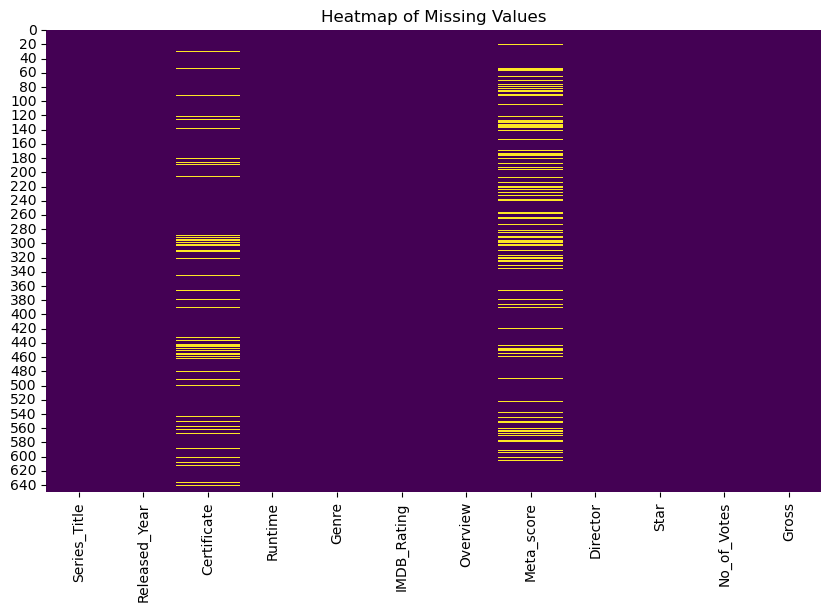

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [7]:
# Check for infinite values in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    inf_count = df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values.")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Fill missing values for numerical columns with the mean (example)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [9]:
#Replace missing values in categorical columns.
df['Certificate'] = df['Certificate'].fillna('Unknown')

               Missing Values  Percentage
Series_Title                0         0.0
Released_Year               0         0.0
Certificate                 0         0.0
Runtime                     0         0.0
Genre                       0         0.0
IMDB_Rating                 0         0.0
Overview                    0         0.0
Meta_score                  0         0.0
Director                    0         0.0
Star                        0         0.0
No_of_Votes                 0         0.0
Gross                       0         0.0


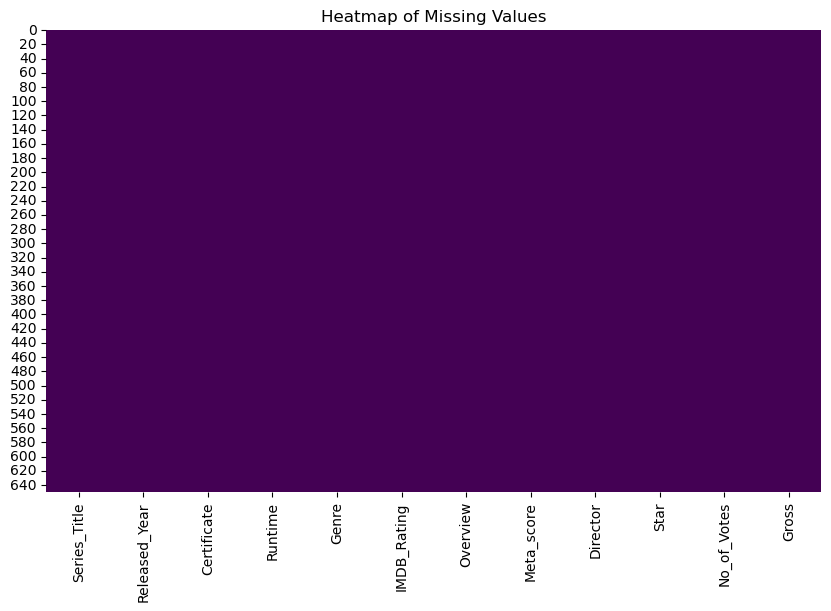

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [11]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [12]:
df.drop(columns=['Series_Title'], inplace=True)
df.drop(columns=['Overview'], inplace=True)
df.head()


,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  650 non-null    int64  
 1   Certificate    650 non-null    object 
 2   Runtime        650 non-null    object 
 3   Genre          650 non-null    object 
 4   IMDB_Rating    650 non-null    float64
 5   Meta_score     650 non-null    float64
 6   Director       650 non-null    object 
 7   Star           650 non-null    object 
 8   No_of_Votes    650 non-null    int64  
 9   Gross          650 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 50.9+ KB


In [14]:
# Converting 'Runtime' column (e.g., '142 min') to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   Released_Year  Certificate  Runtime  Genre  IMDB_Rating  Meta_score  \
0           1994            1      142    117          9.3        80.0   
1           1972            1      175    103          9.2       100.0   
2           2008           13      152     17          9.0        84.0   
3           1974            1      202    103          9.0        90.0   
4           1957           12       96    103          9.0        96.0   

   Director  Star  No_of_Votes        Gross  
0        97   412      2343110   28341469.0  
1        95   291      1620367  134966411.0  
2        54    90      2303232  534858444.0  
3        95     7      1129952   57300000.0  
4       318   183       689845    4360000.0  

Data Types after Encoding:
Released_Year      int64
Certificate        int32
Runtime            int32
Genre              int32
IMDB_Rating      float64
Meta_score       float64
Director           int32
Star               int32
No_of_Votes        int64

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


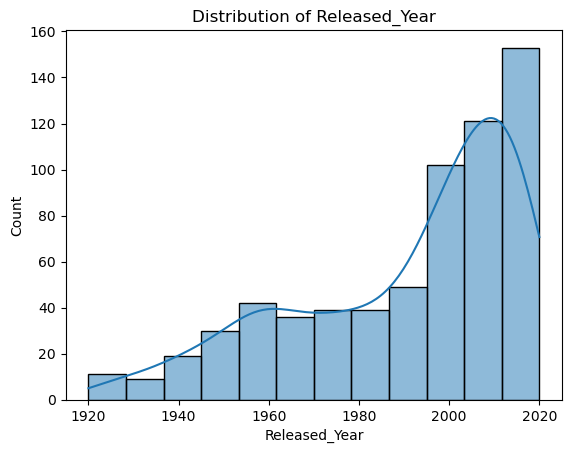

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


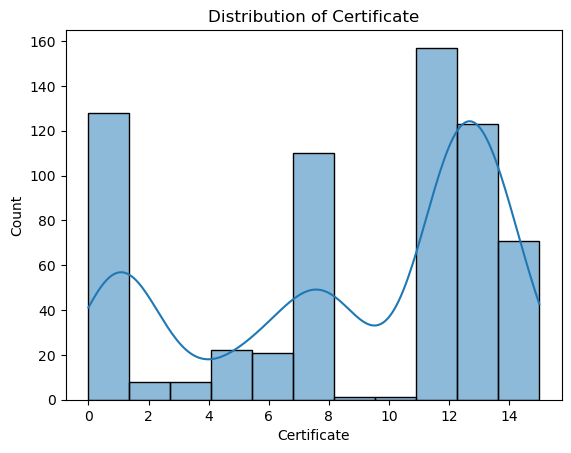

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


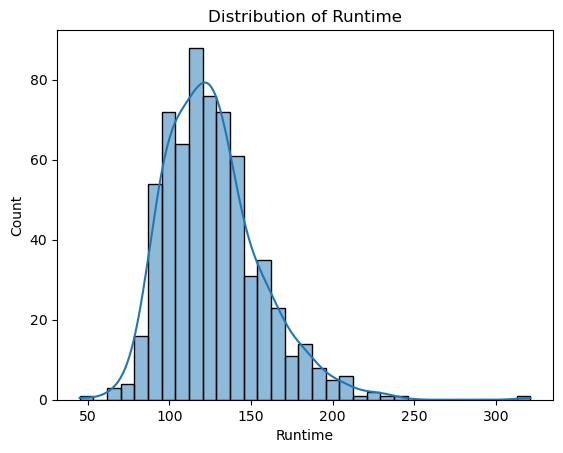

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


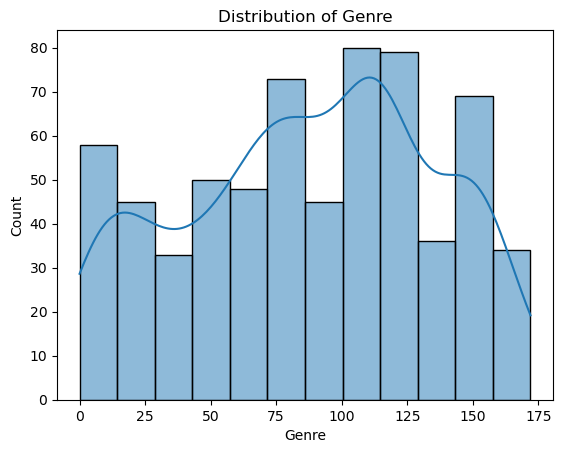

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


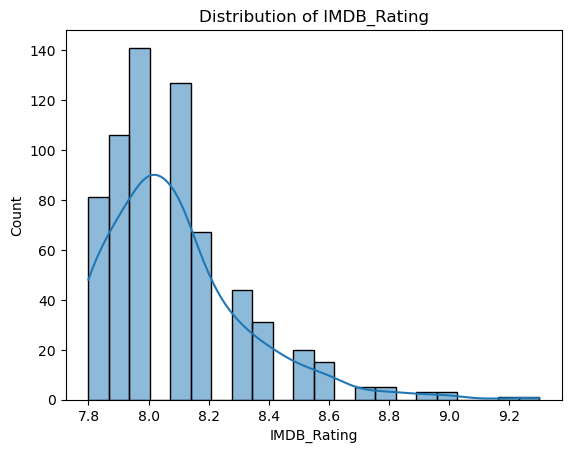

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


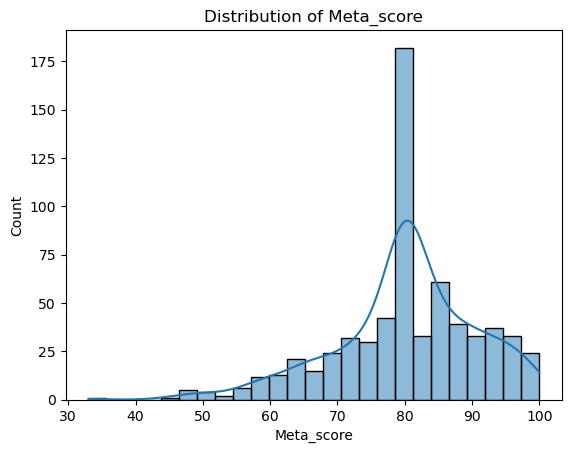

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


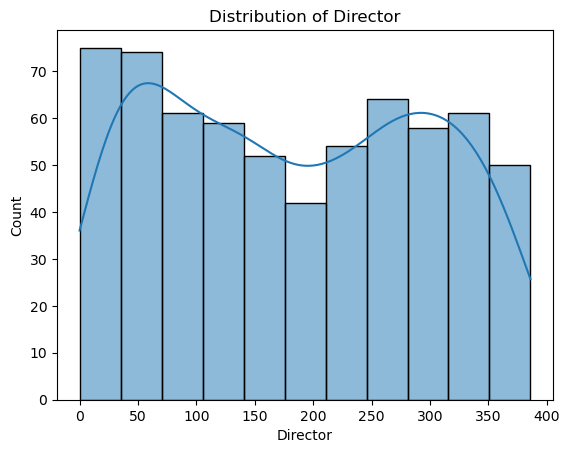

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


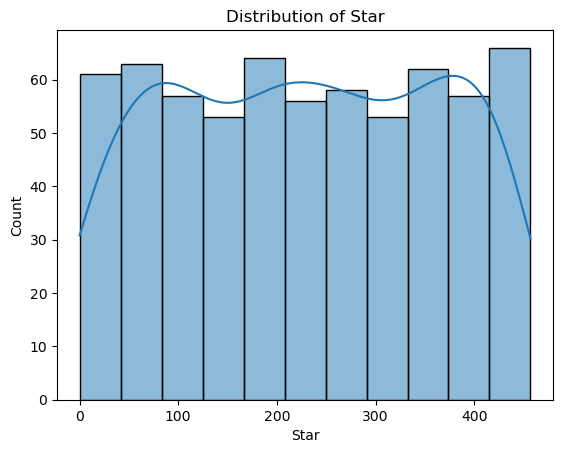

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


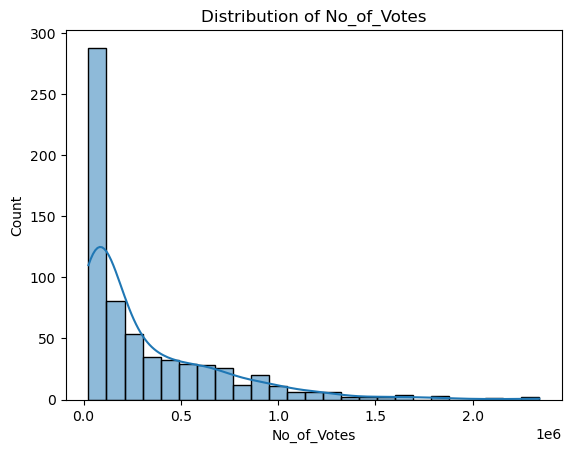

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


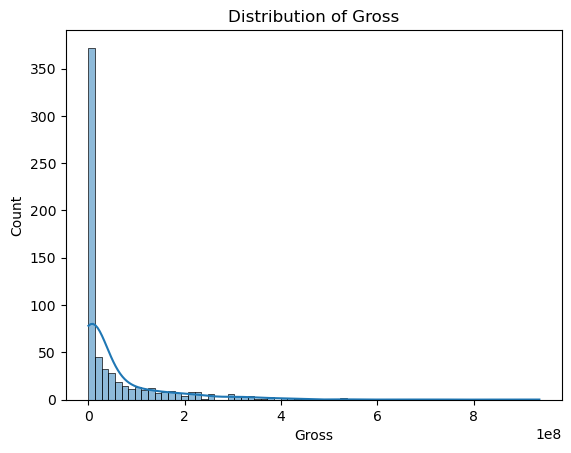

In [15]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [16]:
for column in df.select_dtypes(include=[object]).columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [17]:
# Check unique class counts for each column
print("Class distribution for Certificate:")
print(df['Certificate'].value_counts())

print("\nClass distribution for Genre:")
print(df['Genre'].value_counts())

print("\nClass distribution for IMDB_Rating (binned):")
df['Rating_Category'] = pd.cut(df['IMDB_Rating'], bins=[0, 7.9, 8.2, 10], labels=['Low', 'Medium', 'High'])
print(df['Rating_Category'].value_counts())

Class distribution for Certificate:
Certificate
12    155
1     127
13    123
8      84
14     70
7      26
5      22
6      21
2       8
3       7
11      2
9       1
0       1
10      1
15      1
4       1
Name: count, dtype: int64

Class distribution for Genre:
Genre
117    57
149    25
103    21
73     20
85     20
       ..
60      1
83      1
82      1
41      1
42      1
Name: count, Length: 173, dtype: int64

Class distribution for IMDB_Rating (binned):
Rating_Category
Medium    335
Low       187
High      128
Name: count, dtype: int64


C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


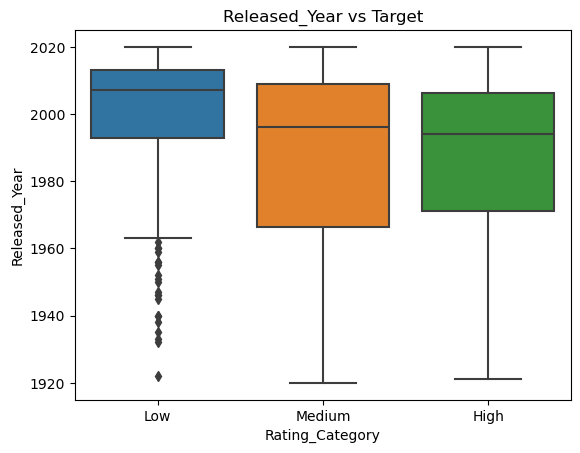

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


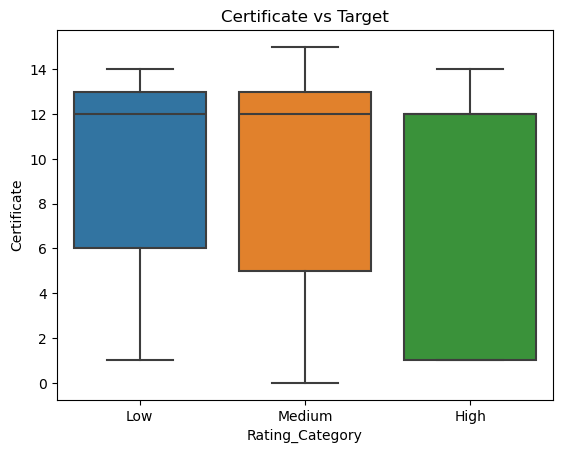

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


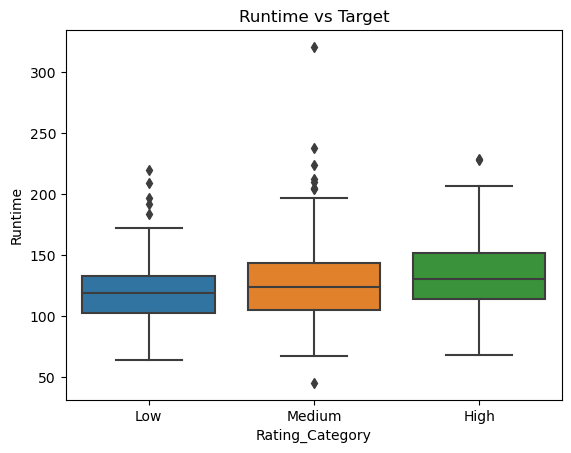

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


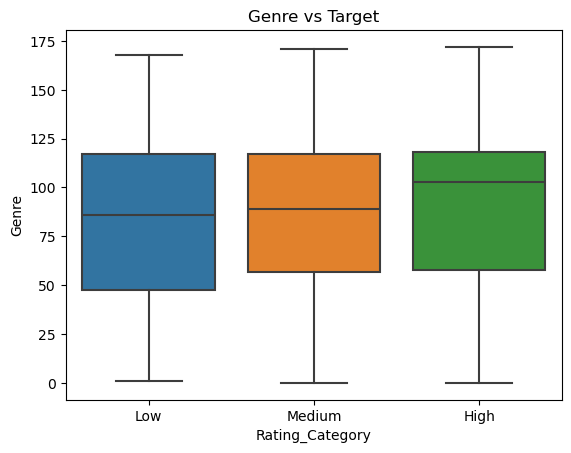

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


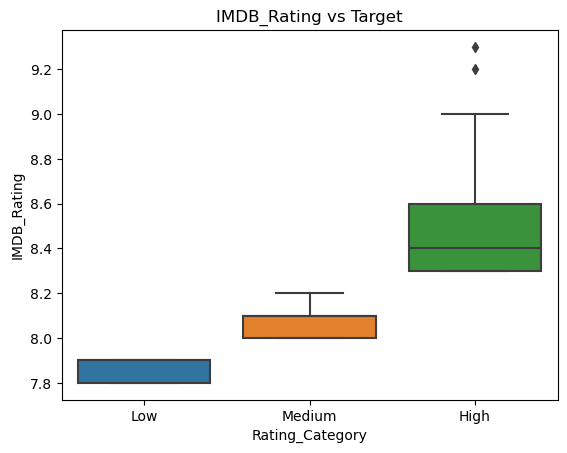

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


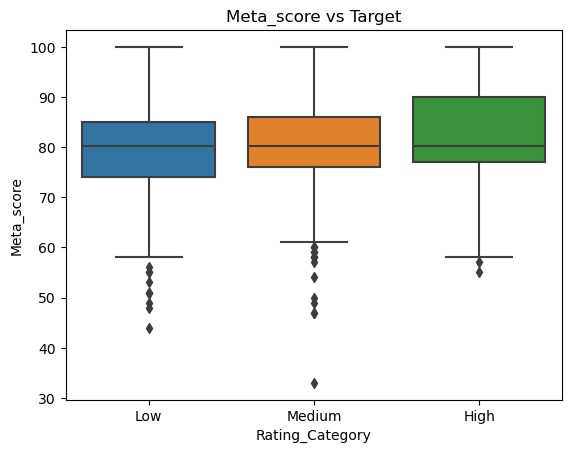

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


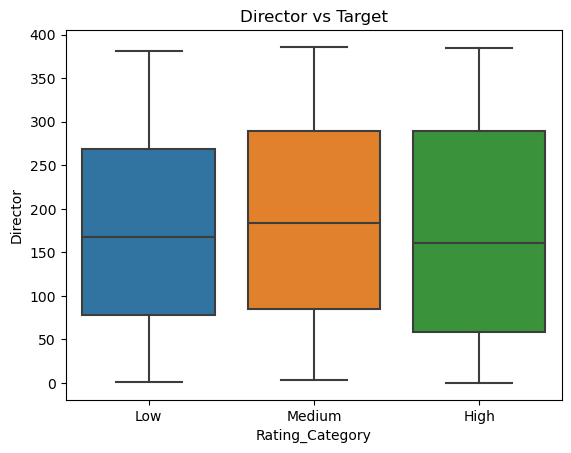

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


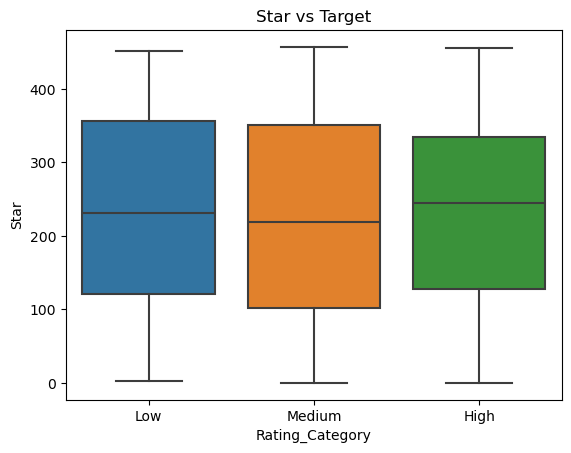

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


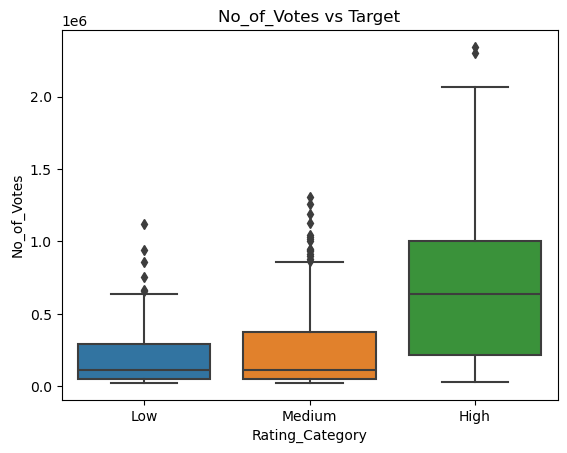

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


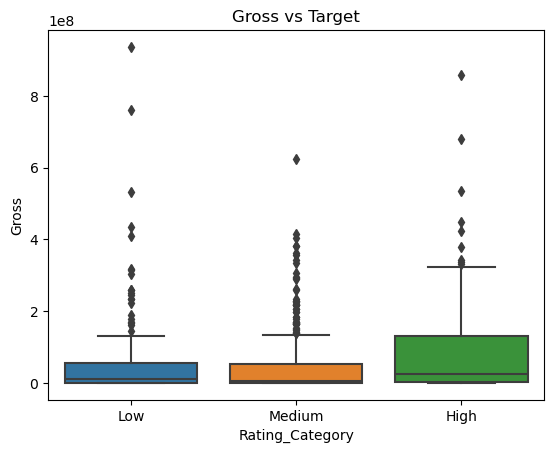

In [18]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x='Rating_Category', y=column, data=df)
    plt.title(f'{column} vs Target')
    plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Baseline Decision Tree (no pruning)
def baseline_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the decision tree without pruning
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions and performance
    y_pred = model.predict(X_test)
    print("\nBaseline Decision Tree:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize the tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
    plt.title("Baseline Decision Tree")
    plt.show()
    
    return model

# Pre-pruned Decision Tree
def pre_pruned_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the decision tree with pre-pruning
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions and performance
    y_pred = model.predict(X_test)
    print("\nPre-Pruned Decision Tree:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize the tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
    plt.title("Pre-Pruned Decision Tree")
    plt.show()
    
    return model

# Post-pruned Decision Tree
def post_pruned_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the initial tree
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Cost-complexity pruning
    path = model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    
    best_model = None
    best_accuracy = 0
    
    print("\nPost-Pruned Decision Tree:")
    for ccp_alpha in ccp_alphas:
        temp_model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        temp_model.fit(X_train, y_train)
        y_pred = temp_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"ccp_alpha: {ccp_alpha:.5f}, Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = temp_model

    # Evaluate the best post-pruned model
    y_pred = best_model.predict(X_test)
    print(f"\nBest Post-Pruned Decision Tree with ccp_alpha={best_model.ccp_alpha}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize the tree
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
    plt.title(f"Post-Pruned Decision Tree (ccp_alpha={best_model.ccp_alpha:.5f})")
    plt.show()
    
    return best_model

# Comparison function
def compare_models(baseline_model, pre_pruned_model, post_pruned_model, X_test, y_test):
    models = {
        "Baseline": baseline_model,
        "Pre-Pruned": pre_pruned_model,
        "Post-Pruned": post_pruned_model
    }
    print("\nComparison of Models:")
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Model Accuracy: {accuracy:.4f}")


Baseline Decision Tree:
Accuracy: 0.5384615384615384
Confusion Matrix:
 [[15  6 10]
 [ 4 11 17]
 [ 6 17 44]]
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.48      0.54        31
         Low       0.32      0.34      0.33        32
      Medium       0.62      0.66      0.64        67

    accuracy                           0.54       130
   macro avg       0.51      0.49      0.50       130
weighted avg       0.54      0.54      0.54       130



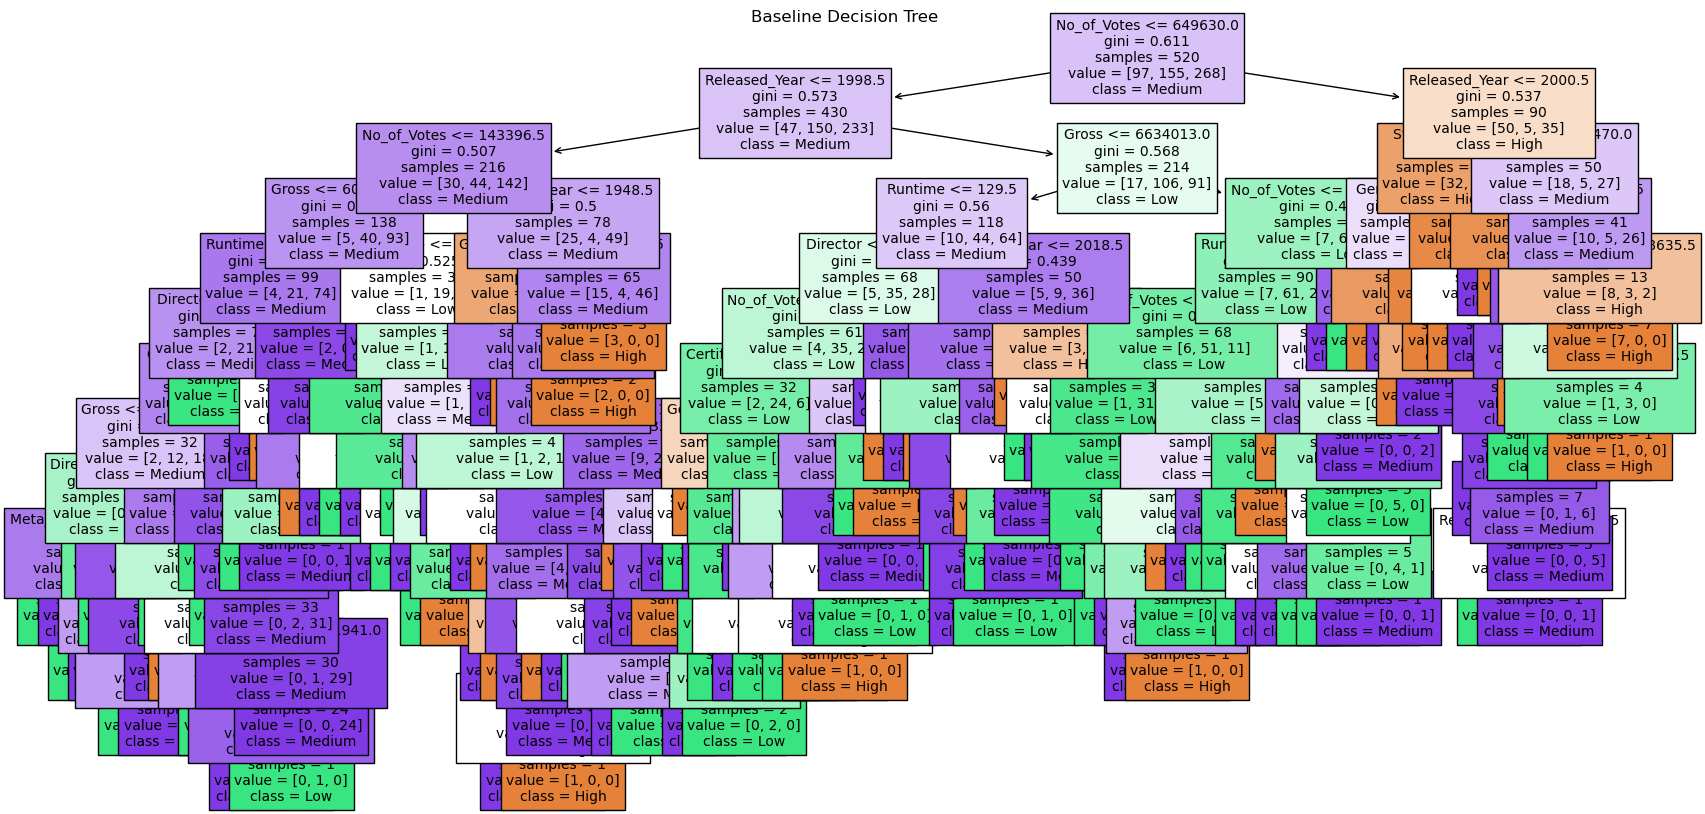


Pre-Pruned Decision Tree:
Accuracy: 0.5230769230769231
Confusion Matrix:
 [[13  4 14]
 [ 1 15 16]
 [ 6 21 40]]
Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.42      0.51        31
         Low       0.38      0.47      0.42        32
      Medium       0.57      0.60      0.58        67

    accuracy                           0.52       130
   macro avg       0.53      0.50      0.50       130
weighted avg       0.54      0.52      0.53       130



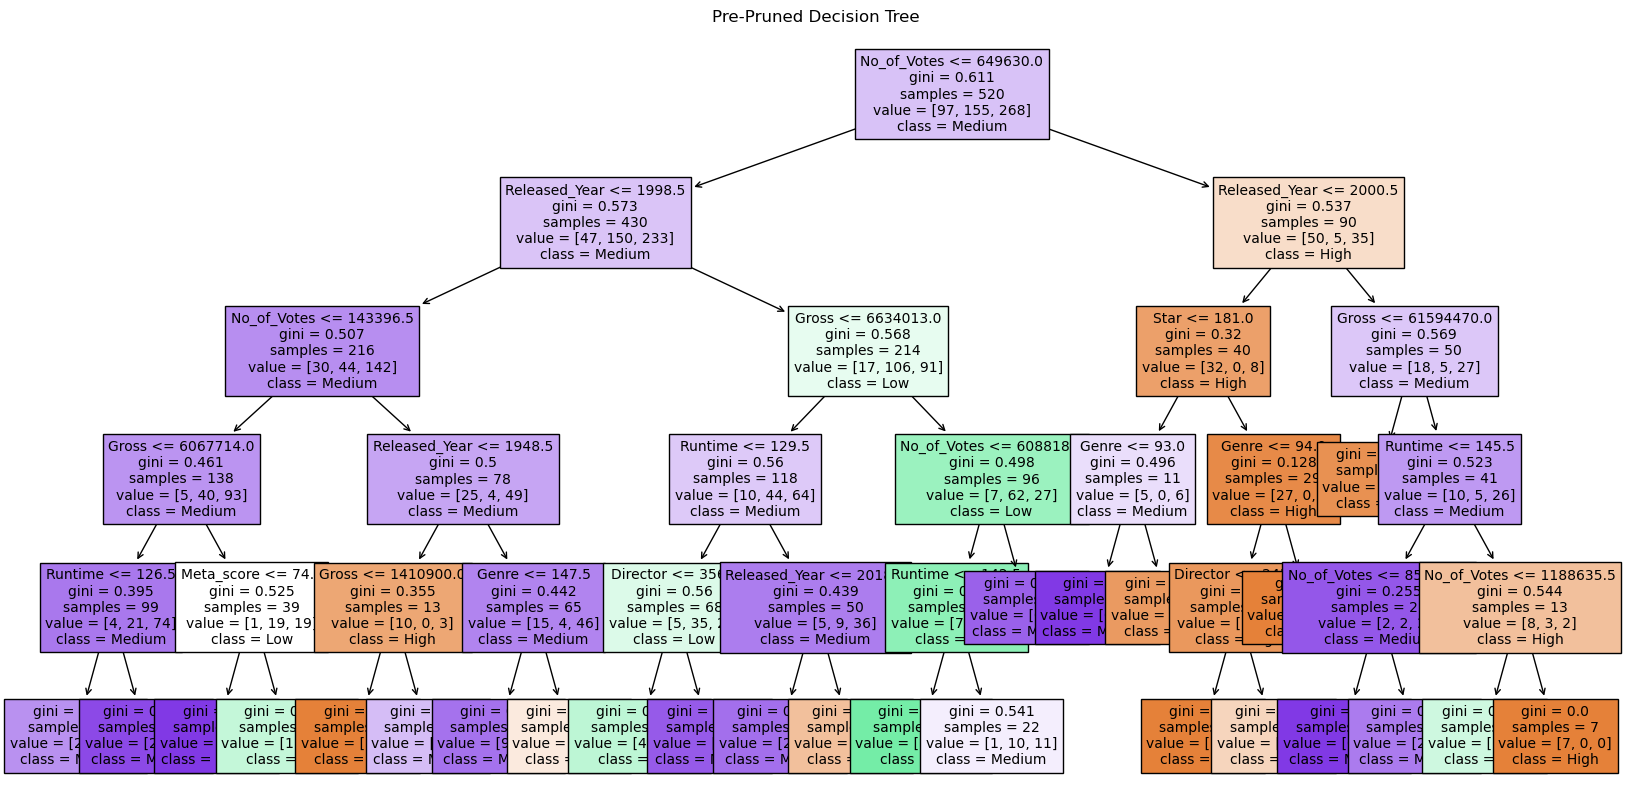


Post-Pruned Decision Tree:
ccp_alpha: 0.00000, Accuracy: 0.5385
ccp_alpha: 0.00123, Accuracy: 0.5385
ccp_alpha: 0.00165, Accuracy: 0.5385
ccp_alpha: 0.00165, Accuracy: 0.5385
ccp_alpha: 0.00173, Accuracy: 0.5385
ccp_alpha: 0.00176, Accuracy: 0.5385
ccp_alpha: 0.00177, Accuracy: 0.5462
ccp_alpha: 0.00178, Accuracy: 0.5538
ccp_alpha: 0.00178, Accuracy: 0.5538
ccp_alpha: 0.00179, Accuracy: 0.5538
ccp_alpha: 0.00179, Accuracy: 0.5538
ccp_alpha: 0.00179, Accuracy: 0.5385
ccp_alpha: 0.00179, Accuracy: 0.5385
ccp_alpha: 0.00181, Accuracy: 0.5385
ccp_alpha: 0.00186, Accuracy: 0.5385
ccp_alpha: 0.00192, Accuracy: 0.5231
ccp_alpha: 0.00192, Accuracy: 0.5231
ccp_alpha: 0.00192, Accuracy: 0.5231
ccp_alpha: 0.00192, Accuracy: 0.5231
ccp_alpha: 0.00192, Accuracy: 0.5231
ccp_alpha: 0.00249, Accuracy: 0.5231
ccp_alpha: 0.00256, Accuracy: 0.5231
ccp_alpha: 0.00256, Accuracy: 0.5231
ccp_alpha: 0.00256, Accuracy: 0.5231
ccp_alpha: 0.00256, Accuracy: 0.5231
ccp_alpha: 0.00256, Accuracy: 0.5231
ccp_alpha:

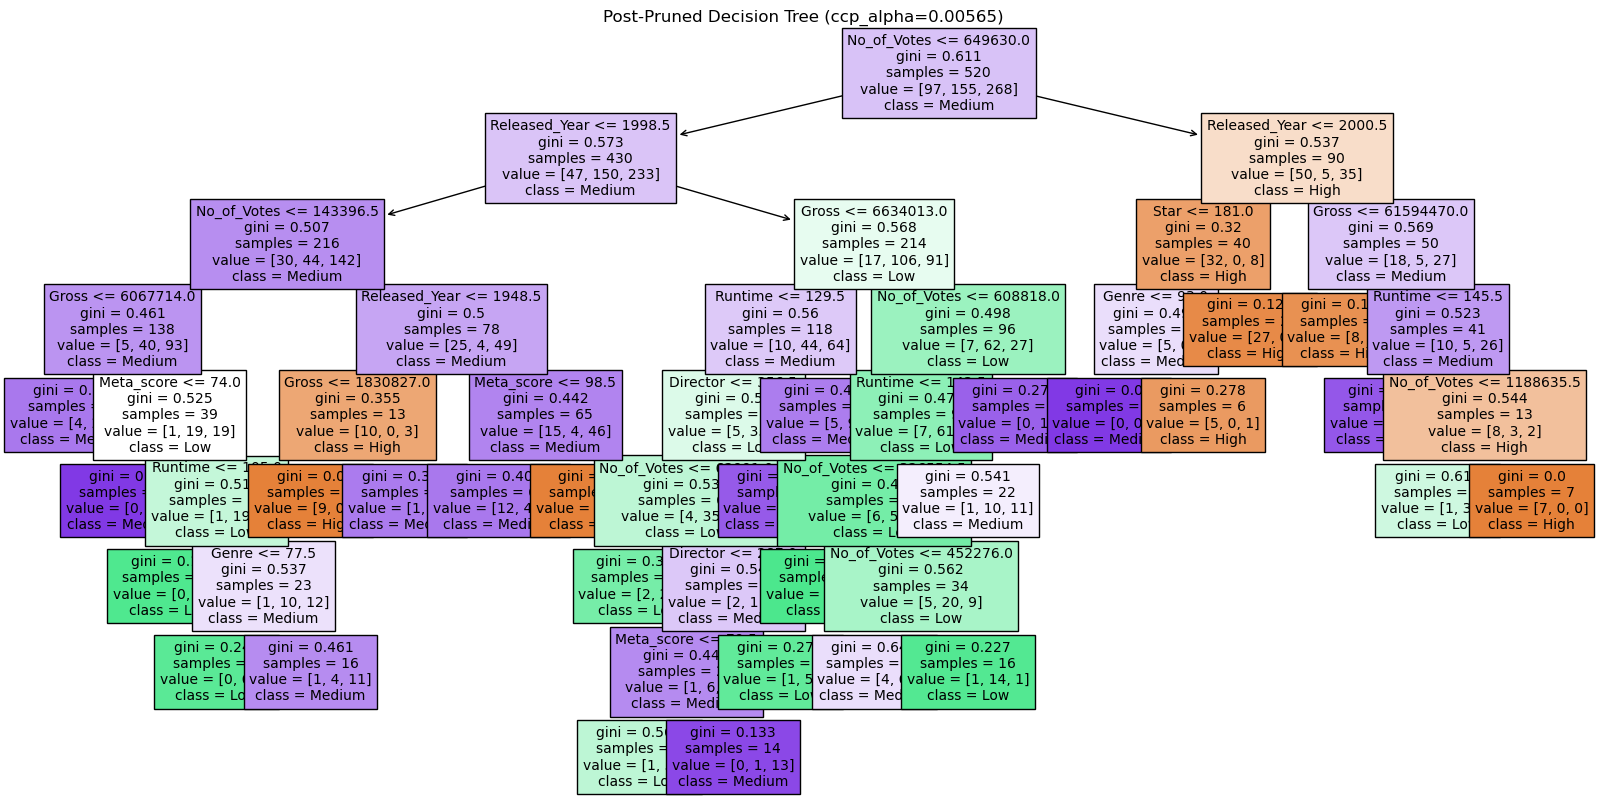


Comparison of Models:
Baseline Model Accuracy: 0.5385
Pre-Pruned Model Accuracy: 0.5231
Post-Pruned Model Accuracy: 0.6077


In [20]:
X = df.drop(columns=['Rating_Category','IMDB_Rating'])  # Features
y = df['Rating_Category']  # Target


# Calling the baseline decision tree function
baseline_model = baseline_decision_tree(X, y)

# Calling the pre-pruned decision tree function
pre_pruned_model = pre_pruned_decision_tree(X, y)

# Calling the post-pruned decision tree function
post_pruned_model = post_pruned_decision_tree(X, y)

# Train-test split to get X_test and y_test for comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparing the models
compare_models(baseline_model, pre_pruned_model, post_pruned_model, X_test, y_test)

### Inference:

1. **Baseline Decision Tree**:
   - **Accuracy**: 0.5385
   - The baseline model captures the patterns in the data but lacks any form of optimization. It performs reasonably well, but the results suggest overfitting due to its unoptimized structure. This is evident from its relatively low recall for the "High" and "Low" classes, indicating poor generalization.

2. **Pre-Pruned Decision Tree**:
   - **Accuracy**: 0.5231
   - The pre-pruned model, which applies restrictions on maximum depth, minimum samples per leaf, or minimum samples for a split, achieves slightly lower accuracy compared to the baseline. This decrease is likely due to underfitting, where the constraints prevent the model from capturing important patterns in the data. However, it might provide better generalization in some cases, though not in this dataset.

3. **Post-Pruned Decision Tree**:
   - **Best Accuracy**: 0.6077 (at `ccp_alpha = 0.00565`)
   - Post-pruning significantly improves the model's performance, achieving the highest accuracy among all models. By iteratively removing less important splits (controlled by `ccp_alpha`), the model balances complexity and generalization effectively.
   - The confusion matrix shows improved recall for the "Medium" class and precision for the "High" class. This indicates the model generalizes better, particularly for larger class distributions.
   - The macro average metrics show an improvement in precision and recall, highlighting a balanced performance across all classes.
